In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


### Bayes Theroem of Conditional Probability

P(A|B) = (P(A|B) * P(A)) / P(B)

### Navive Bayes Algorithm

Only check the given conditions for determining the classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
data.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [ ]:
data

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
data.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [ ]:
data.Age.fillna(data.Age.mean(), inplace=True)

In [ ]:
data.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data.Sex = data.Sex.map({'male':1, 'female':0})

In [ ]:
data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [ ]:
data.describe()

,Pclass,Sex,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,32.204208,0.383838
std,0.836071,0.477990,13.002015,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.910400,0.000000
50%,3.000000,1.000000,29.699118,14.454200,0.000000
75%,3.000000,1.000000,35.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


<Axes: >

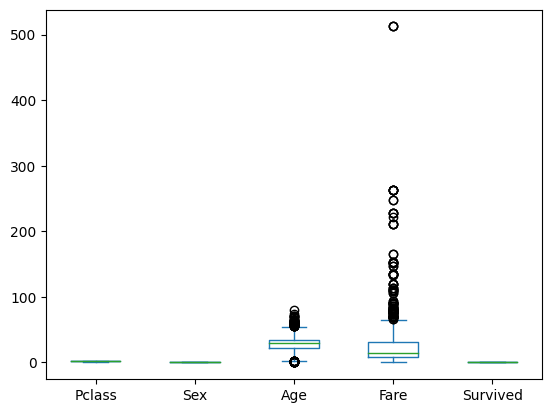

In [ ]:
data.plot(kind='box')

In [ ]:
inputs = data.drop('Survived', axis=1)
target = data.Survived

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:
x_train

,Pclass,Sex,Age,Fare
650,3,1,29.699118,7.8958
777,3,0,5.000000,12.4750
239,2,1,33.000000,12.2750
709,3,1,29.699118,15.2458
157,3,1,30.000000,8.0500
...,...,...,...,...
712,1,1,48.000000,52.0000
140,3,0,29.699118,15.2458
504,1,0,16.000000,86.5000
783,3,1,29.699118,23.4500


In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()

In [ ]:
modelNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = modelNB.predict(x_test)

In [ ]:
x_test.head()

,Pclass,Sex,Age,Fare
612,3,0,29.699118,15.5000
733,2,1,23.000000,13.0000
499,3,1,24.000000,7.7958
26,3,1,29.699118,7.2250
174,1,1,56.000000,30.6958


In [ ]:
y_test.head()

612    1
733    0
499    0
26     0
174    0
Name: Survived, dtype: int64

In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy is : ', accuracy_score(y_test,y_pred))

Accuracy is :  0.8100558659217877


In [ ]:
#SVM Model
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svmclf.predict(x_test)

In [ ]:
print('Accuracy is : ', accuracy_score(y_test,y_pred))

Accuracy is :  0.8715083798882681


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print('Accuracy is : ', accuracy_score(y_test,y_pred))

Accuracy is :  0.7597765363128491


In [41]:
drug_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [42]:
drug_data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [43]:
drug_data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [45]:
drug_data.Drug = le.fit_transform(drug_data.Drug)

In [46]:
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,0
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,0


In [47]:
drug_data = pd.get_dummies(drug_data)

In [48]:
drug_data

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,0,1,0,1,0,0,1,0
1,47,13.093,3,0,1,0,1,0,1,0
2,47,10.114,3,0,1,0,1,0,1,0
3,28,7.798,4,1,0,0,0,1,1,0
4,61,18.043,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,3,1,0,0,1,0,1,0
196,16,12.006,3,0,1,0,1,0,1,0
197,52,9.894,4,0,1,0,0,1,1,0
198,23,14.020,4,0,1,0,0,1,0,1


<Axes: >

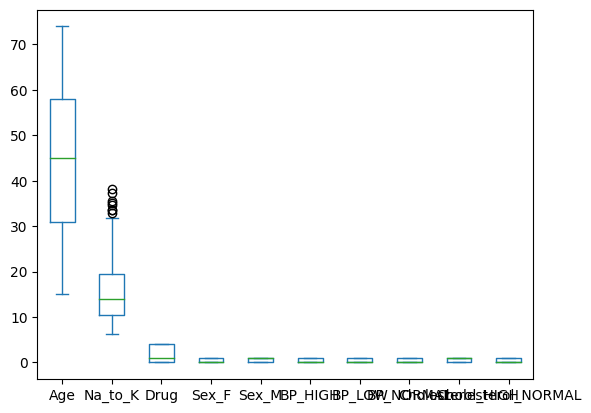

In [49]:
drug_data.plot(kind='box')

In [50]:
drug_data.describe()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,1.595000,0.480000,0.520000,0.385000,0.320000,0.295000,0.515000,0.485000
std,16.544315,7.223956,1.716305,0.500854,0.500854,0.487816,0.467647,0.457187,0.501029,0.501029
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,13.936500,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,19.380000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,74.000000,38.247000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
x = drug_data.drop(columns=['Drug'])
y = drug_data.Drug
x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [52]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
81,64,7.761,0,1,0,0,1,1,0
164,16,19.007,0,1,1,0,0,0,1
84,47,10.067,1,0,0,1,0,1,0
131,52,32.922,0,1,0,1,0,0,1
108,72,9.677,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
51,67,10.898,0,1,0,0,1,0,1
178,39,15.969,0,1,0,0,1,1,0
190,58,18.991,0,1,1,0,0,1,0
199,40,11.349,1,0,0,1,0,0,1


#### Naive Bayes

In [78]:
modelNB.fit(x_train, y_train)

GaussianNB()

In [79]:
y_pred = modelNB.predict(x_test)

In [80]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.8


#### KNN

In [81]:
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  knn_clf = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2)# P=1 manhattan, p=2 Eucledian
  knn_clf.fit(x_train,y_train)
  y_pred_knn = knn_clf.predict(x_test)
  acc= accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [82]:
metric_k

[0.625, 0.65, 0.575, 0.6, 0.5, 0.625, 0.6, 0.625, 0.625, 0.625, 0.6, 0.6]

In [83]:
knn = KNeighborsClassifier(n_neighbors=6,  metric = 'minkowski', p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy score : ', accuracy_score(y_test,y_pred))

Accuracy score :  0.6


#### SVC

In [84]:
svc_type = ['linear', 'rbf', 'poly']

In [85]:
from sklearn.svm import SVC


In [86]:
acc = []
for sv in svc_type:
  svc = SVC(kernel= sv)
  svc.fit(x_train, y_train)
  y_pred = svc.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))



In [87]:
acc

[1.0, 0.65, 0.625]

In [88]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  1.0


In [89]:
y_test

187    1
155    3
17     1
163    0
2      3
92     0
120    0
4      0
70     2
109    0
56     2
5      4
38     4
183    0
18     3
117    4
162    4
88     0
179    0
181    4
194    0
59     0
151    2
10     3
60     0
93     0
148    4
116    4
49     0
167    4
16     4
21     0
145    4
144    1
67     4
192    0
197    4
195    3
73     0
47     3
Name: Drug, dtype: int64

In [90]:
y_pred

array([1, 3, 1, 0, 3, 0, 0, 0, 2, 0, 2, 4, 4, 0, 3, 4, 4, 0, 0, 4, 0, 0,
       2, 3, 0, 0, 4, 4, 0, 4, 4, 0, 4, 1, 4, 0, 4, 3, 0, 3])

In [91]:
y_test.values == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])